In [ ]:
%matplotlib inline



The [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) data structure: continuous data
=============================================================

Continuous data is stored in objects of type [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html).
The core data structure is simply a 2D numpy array (channels × samples)
(in memory or loaded on demand) combined with an
[Info](https://martinos.org/mne/stable/generated/mne.Info.html#mne.Info) object (`.info` attribute)
(see [The Info data structure](https://martinos.org/mne/stable/auto_tutorials/plot_info.html#tut-info-objects)).



Loading continuous data
-----------------------

The most common way to load continuous data is from a .fif file. For more
information on [loading data from other formats](https://martinos.org/mne/stable/manual/io.html#ch-convert), or
creating it [from scratch](https://martinos.org/mne/stable/auto_tutorials/plot_creating_data_structures.html#tut-creating-data-structures).

In [28]:
import mne
import os.path as op
from matplotlib import pyplot as plt

Load an example dataset, the `preload` flag loads the data into memory now:

In [29]:
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(data_path, preload=True, verbose=False)

We can control how much info MNE gives using the `verbose` parameter.

In [30]:
raw = mne.io.read_raw_fif(data_path, preload=True, verbose=True)

Opening raw data file /Users/mainak/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


In [25]:
raw.set_eeg_reference('average', projection=True);  # set EEG average reference

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


We can output the information in the `raw` file by doing (NOTE: information may be formatted differently in terminal):

In [31]:
raw

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


or

In [32]:
raw.info

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


`info` a dictionary, so it can be read using similar syntax as a `dict`

In [11]:
# Give the sample rate
print('sample rate:', raw.info['sfreq'], 'Hz')
# Give the size of the data matrix
print('%s channels x %s samples' % (len(raw), len(raw.times)))

sample rate: 600.614990234375 Hz
166800 channels x 166800 samples


**Note:**
This size can also be obtained by examining `raw._data.shape`.
However this is a private attribute as its name starts
with an `_`. This suggests that you should **not** access this
variable directly but rely on indexing syntax detailed just below.

Information about the channels contained in the [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html)
object is contained in the [Info](https://martinos.org/mne/stable/generated/mne.Info.html#mne.Info) attribute.
This is essentially a dictionary with a number of relevant fields (see
[The Info data structure](https://martinos.org/mne/stable/auto_tutorials/plot_info.html#tut-info-objects)).



Visualizing Raw data
--------------------
All of the plotting method names start with `plot`. If you’re using IPython console, you can just
write `raw.plot` and ask the interpreter for suggestions with a tab key.

To visually inspect your raw data, you can use:

In [15]:
import mne
mne.viz.set_browser_backend('matplotlib')
# mne.viz.set_browser_backend('qt')

'matplotlib'

In [16]:
# %matplotlib qt

In [19]:
raw.plot(block=True, lowpass=40);

Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB

Channels marked as bad:
['MEG 2443', 'EEG 053']


The channels are color coded by channel type. 
* MEG = blue, EEG = black
* Bad channels on scrollbar color coded gray. 
* Clicking the lines or channel names on the left, to mark or unmark a bad channel interactively. 
* +/- keys to adjust the scale (also = works for magnifying the data).
* Initial scaling factors can be set with parameter `scalings`. 
* If you don’t know the scaling factor for channels, you can automatically set them by passing scalings=’auto’. 
* With `pageup/pagedown` and `home/end` keys you can adjust the amount of data viewed at once.

In [21]:
%matplotlib inline

We can also plot the PSD:

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


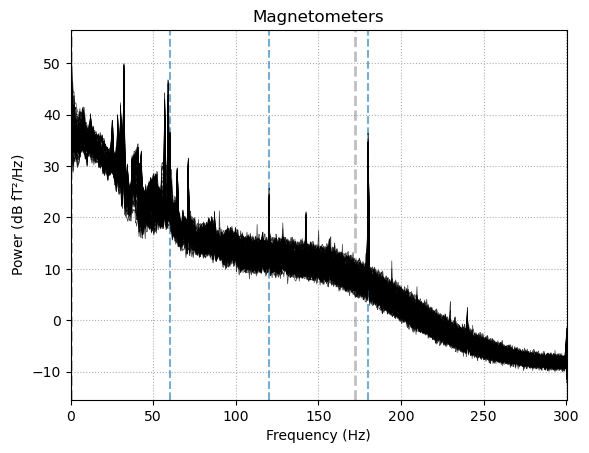

In [22]:
fig, ax = plt.subplots(1, 1)
raw.compute_psd(picks='mag').plot(spatial_colors=False, amplitude=False, show=False, axes=ax);
for freq in [60., 120., 180.]:
    ax.axvline(freq, linestyle='--', alpha=0.6)

In [ ]:
Can be used to inspect:
* Power line
* Bad channels
* Head position indicator coils
* Whether data is filtered or not

Exercises
--------------

1) Quite often the EOG channel is not marked correctly in the raw data. You may need to rename it. Can you figure out how to do this?

In [47]:
# your code here

2) How will you check that at least one EEG channel exists in the data?

In [48]:
# your code here

3) Can you plot the data in the trigger channel?

*HINT*: The channel type is called 'stim'

In [49]:
from mne import pick_types
import matplotlib.pyplot as plt

# your code here



The [mne.Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) data structure: epoched data
=============================================================

[Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) objects are a way of representing continuous
data as a collection of time-locked trials, stored in an array of shape
``(n_events, n_channels, n_times)``. They are useful for many statistical
methods in neuroscience, and make it easy to quickly overview what occurs
during a trial.



Creating epochs
=============

[Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) objects can be created in three ways:
 1. From a [Raw](https://martinos.org/mne/stable/generated/mne.io.Raw.html) object, along with event times
 2. From an [Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) object that has been saved as a
    `.fif` file
 3. From scratch using [EpochsArray](https://martinos.org/mne/dev/generated/mne.EpochsArray.html#mne.EpochsArray). See
    [Creating MNE's data structures from scratch](https://martinos.org/mne/stable/auto_tutorials/plot_creating_data_structures.html#tut-creating-data-structures)



Import packages

In [50]:
import mne
import os.path as op
import numpy as np
from matplotlib import pyplot as plt

Then, we will load the data

In [51]:
data_path = mne.datasets.sample.data_path()
# Load a dataset that contains events
raw = mne.io.read_raw_fif(
    op.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif'))

Opening raw data file /Users/mainak/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


Extract events
--------------

In [52]:
# If your raw object has a stim channel, you can construct an event array
# easily
events = mne.find_events(raw, stim_channel='STI 014')

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]


In [53]:
print(events[:5])

[[27977     0     2]
 [28345     0     3]
 [28771     0     1]
 [29219     0     4]
 [29652     0     2]]


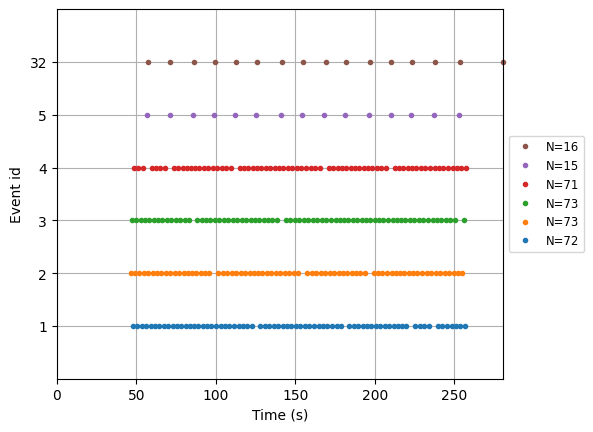

In [54]:
mne.viz.plot_events(events, sfreq=raw.info['sfreq']);

Specify event codes of interest with descriptive labels.

In [55]:
# This dataset also has visual left (3) and right (4) events, but
# to save time and memory we'll just look at the auditory conditions
# for now.
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2}

Expose the raw data as epochs, cut from -0.1 s to 1.0 s relative to the event
onsets

In [56]:
epochs = mne.Epochs(raw, events, event_id, tmin=-0.1, tmax=1,
                    baseline=(None, 0), preload=True)
print(epochs)

Not setting metadata
145 matching events found
Setting baseline interval to [-0.09989760657919393, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 145 events and 662 original time points ...
0 bad epochs dropped
<Epochs |  145 events (all good), -0.0998976 – 1.00064 s, baseline -0.0998976 – 0 s, ~278.6 MB, data loaded,
 'Auditory/Left': 72
 'Auditory/Right': 73>


Note that epochs constructed in this manner will not have their
data available until explicitly read into memory, which you can do with
[get_data](https://martinos.org/mne/dev/generated/mne.Epochs.html#mne.Epochs.get_data). Alternatively, you can use
`preload=True`.

Epochs behave similarly to [`mne.io.Raw`](https://martinos.org/mne/dev/generated/mne.io.Raw.html#mne.io.Raw) objects. They have an
[`info`](https://martinos.org/mne/dev/generated/mne.Info.html#mne.Info) attribute that has all of the same
information, as well as a number of attributes unique to the events contained
within the object.



In [57]:
print(epochs.events[:3])
print(epochs.event_id)

[[27977     0     2]
 [28771     0     1]
 [29652     0     2]]
{'Auditory/Left': 1, 'Auditory/Right': 2}


Indexing epochs
=============

You can select subsets of epochs by indexing the [Epochs](https://martinos.org/mne/dev/generated/mne.Epochs.html) 
object directly. Alternatively, if you have epoch names specified in
`event_id` then you may index with strings instead.


In [58]:
print(epochs[1:5])
print(epochs['Auditory/Right'])

<Epochs |  4 events (all good), -0.0998976 – 1.00064 s, baseline -0.0998976 – 0 s, ~10.9 MB, data loaded,
 'Auditory/Left': 2
 'Auditory/Right': 2>
<Epochs |  73 events (all good), -0.0998976 – 1.00064 s, baseline -0.0998976 – 0 s, ~141.9 MB, data loaded,
 'Auditory/Right': 73>


Note the '/'s in the event code labels. These separators allow tag-based
selection of epoch sets; 

Every string separated by '/' can be entered, and
returns the subset of epochs matching any of the strings. E.g.,



In [59]:
print(epochs['Right'])
print(epochs['Right', 'Left'])

<Epochs |  73 events (all good), -0.0998976 – 1.00064 s, baseline -0.0998976 – 0 s, ~141.9 MB, data loaded,
 'Auditory/Right': 73>
<Epochs |  145 events (all good), -0.0998976 – 1.00064 s, baseline -0.0998976 – 0 s, ~278.6 MB, data loaded,
 'Auditory/Left': 72
 'Auditory/Right': 73>


In [60]:
print(epochs['Auditory'])

<Epochs |  145 events (all good), -0.0998976 – 1.00064 s, baseline -0.0998976 – 0 s, ~278.6 MB, data loaded,
 'Auditory/Left': 72
 'Auditory/Right': 73>


Input/Output
------------------

If you wish to save the epochs as a file, you can do it with
[mne.Epochs.save](https://martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.save). To conform to MNE naming conventions, the
epochs file names should end with '-epo.fif'.


In [62]:
epochs_fname = op.join(data_path, 'MEG', 'sample', 'sample-epo.fif')
epochs.save(epochs_fname, overwrite=True)

Overwriting existing file.
Overwriting existing file.


In [63]:
epochs = mne.read_epochs(epochs_fname, preload=False)

Reading /Users/mainak/mne_data/MNE-sample-data/MEG/sample/sample-epo.fif ...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
    Found the data of interest:
        t =     -99.90 ...    1000.64 ms
        0 CTF compensation matrices available
Not setting metadata
145 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
3 projection items activated


If you wish to look at the average across trial types, then you may do so,
creating an [`Evoked`](https://martinos.org/mne/dev/generated/mne.Evoked.html) object in the process. Instances
of `Evoked` are usually created by calling [`mne.Epochs.average`](https://martinos.org/mne/stable/generated/mne.Epochs.html#mne.Epochs.average).


# Visualizing epochs data

We can visualize epochs the same way as raw data

Loading data for 20 events and 662 original time points ...


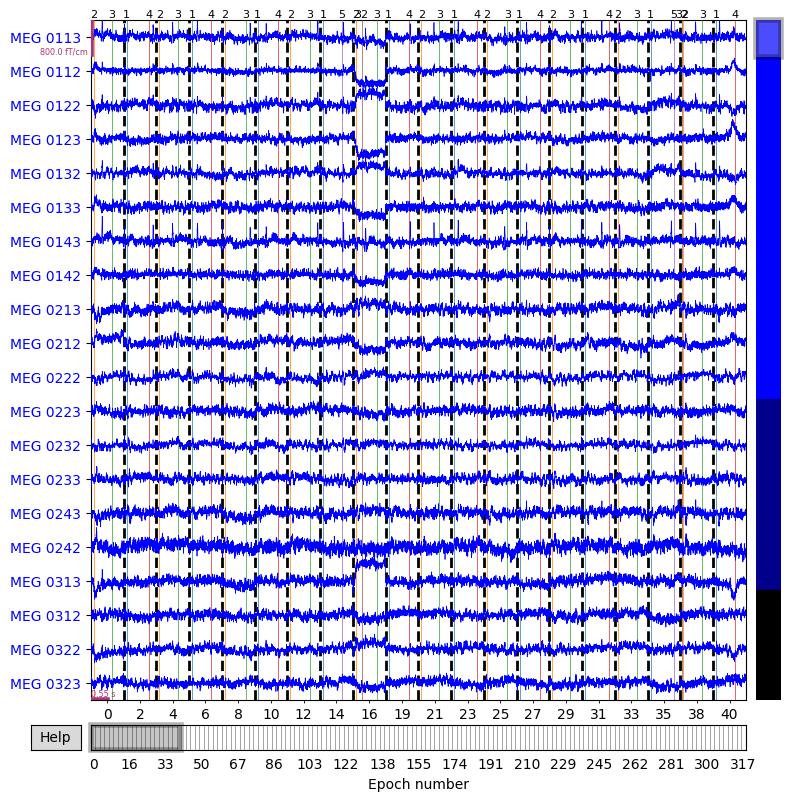

In [65]:
epochs.plot(block=True, events=events);

We can mark bad epochs interactively and scroll through the data

Exercises
--------------
1) Can you find out the indices of the epochs that have been removed due to eyeblinks?

In [66]:
epochs = mne.read_epochs(epochs_fname, preload=False)
# your code here
# print(idxs)

Reading /Users/mainak/mne_data/MNE-sample-data/MEG/sample/sample-epo.fif ...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
    Found the data of interest:
        t =     -99.90 ...    1000.64 ms
        0 CTF compensation matrices available
Not setting metadata
145 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
3 projection items activated


2) Can you find the indices of channels corresponding to `EOG 061`?

In [67]:
# your code here
# print(epochs.info['ch_names'][picks])

3) Can you plot the EOG channel for these epochs and verify that these do indeed contain eyeblinks?

In [68]:
# your code here



The [mne.Evoked](https://martinos.org/mne/dev/generated/mne.Evoked.html) data structure: evoked/averaged data
=====================================================================

The [`mne.Evoked`](https://martinos.org/mne/dev/generated/mne.Evoked.html) data structure is mainly used for storing
averageddata over trials. In MNE the evoked objects are usually created by
averaging epochs data with [`mne.Epochs.average`](https://martinos.org/mne/dev/generated/mne.Epochs.html#mne.Epochs.average).



In [ ]:
ev_left = epochs['Auditory/Left'].average()
ev_right = epochs['Auditory/Right'].average()

f, axs = plt.subplots(3, 2, figsize=(10, 5))
_ = f.suptitle('Left / Right auditory', fontsize=20)
_ = ev_left.plot(axes=axs[:, 0], show=False, time_unit='s')
_ = ev_right.plot(axes=axs[:, 1], show=False, time_unit='s')

Visualization
-------------

We can plot the evoked response

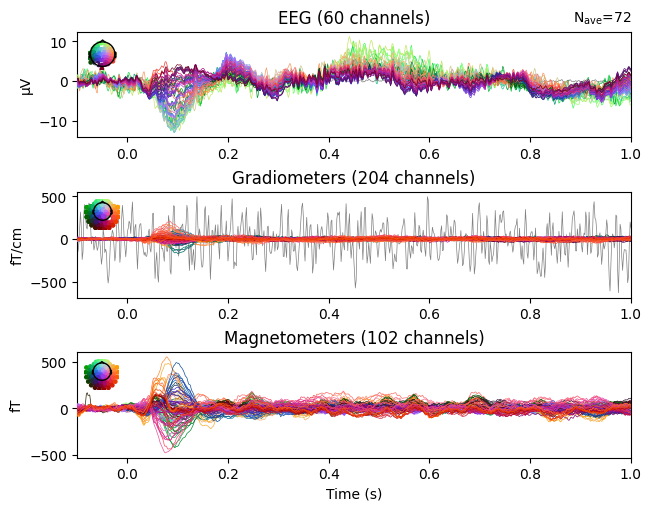

In [71]:
evoked = ev_left
evoked.plot(time_unit='s', exclude=[]);

In [72]:
print(evoked.info)
print(evoked.times)

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 60 EEG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 366
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: on, PCA-v2: on, PCA-v3: on
 sfreq: 600.6 Hz
>
[-0.09989761 -0.09823265 -0.09656769 -0.09490273 -0.09323777 -0.09157281
 -0.08990785 -0.08824289 -0.08657793 -0.08491297 -0.08324801 -0.08158305
 -0.07991809 -0.07825313 -0.07658817 -0.0749232  -0.07325824

In [73]:
print(evoked.nave)  # Number of averaged epochs.
print(evoked.first)  # First time sample.
print(evoked.last)  # Last time sample.
print(evoked.comment)  # Comment on dataset. Usually the condition.
print(evoked.kind)  # Type of data, either average or standard_error.

72
-60
601
Auditory/Left
average


In [74]:
data = evoked.data
print(data.shape)

(366, 662)


In [75]:
print('Data from channel {0}:'.format(evoked.ch_names[10]))
print(data[10])

Data from channel MEG 0142:
[ 1.71704469e-13  1.31522955e-13 -1.89928853e-13  3.77661741e-14
  7.07457465e-13  3.19036574e-13 -6.98894223e-13 -5.78349798e-13
 -2.16716510e-13 -6.98894248e-13 -4.31017736e-13  1.18129141e-13
  1.09785355e-14  5.11600272e-14  1.58310627e-13 -5.64955988e-13
 -7.25681883e-13  2.43723889e-14  7.74426627e-13  8.41395766e-13
  4.39580983e-13 -4.31017719e-13 -8.59620148e-13 -5.11380672e-13
  3.77661981e-14  5.33337743e-13  7.74426615e-13  3.05642718e-13
 -6.85500403e-13 -1.30161641e-12 -5.78349799e-13 -1.09565895e-13
 -6.85500423e-13 -8.46226329e-13 -5.91743633e-13 -2.03322686e-13
  2.38673599e-13  5.33337747e-13  1.85098277e-13 -5.38168329e-13
 -3.90836245e-13  3.77661990e-14 -2.92029209e-14 -6.93844000e-14
  2.52067396e-13  6.94063663e-13  1.71704456e-13 -4.44411544e-13
 -5.59905765e-14  7.20851316e-13  7.61032811e-13  3.99399489e-13
  3.32430365e-13  1.44916789e-13  3.99399527e-13  7.47638985e-13
  3.05642700e-13  7.79476721e-14  6.45538487e-14  1.85098285e-

In [76]:
evoked = mne.EvokedArray(data, evoked.info, tmin=evoked.times[0])


For more information, see
[Creating MNE's data structures from scratch](https://martinos.org/mne/stable/auto_tutorials/plot_creating_data_structures.html#tut-creating-data-structures).

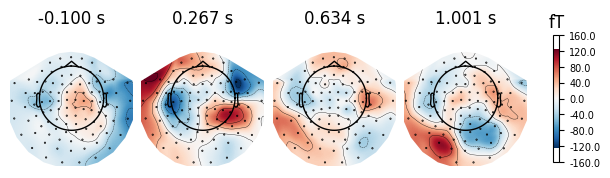

In [78]:
evoked.plot_topomap();

Projections have already been applied. Setting proj attribute to True.


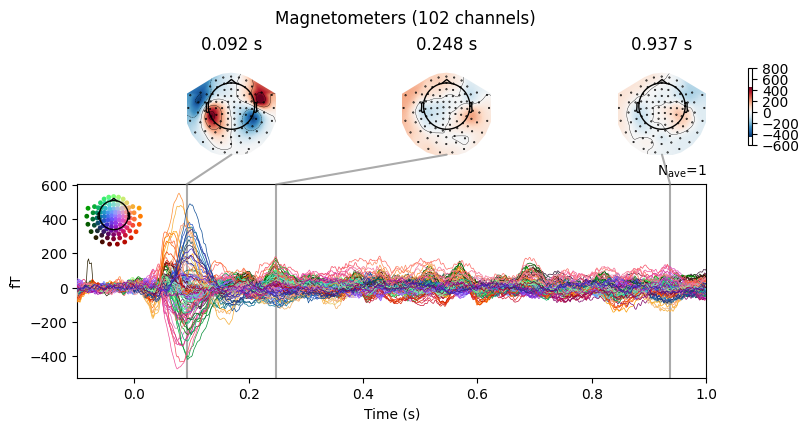

In [79]:
evoked.plot_joint(picks='mag');

In [92]:
data_path = mne.datasets.sample.data_path()
fname = op.join(data_path, 'MEG', 'sample', 'sample_audvis-ave.fif')
evokeds = mne.read_evokeds(fname, baseline=(None, 0), proj=True)
print(evokeds)

Reading /Users/mainak/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline cor

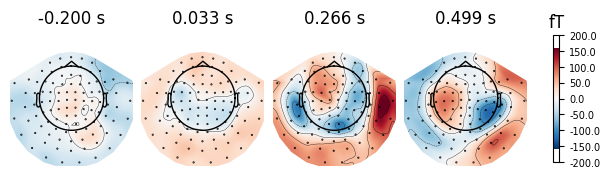

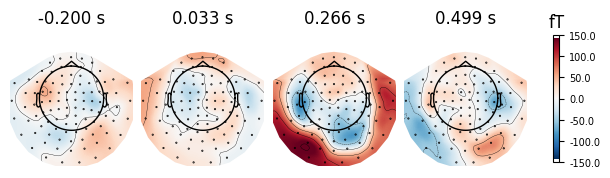

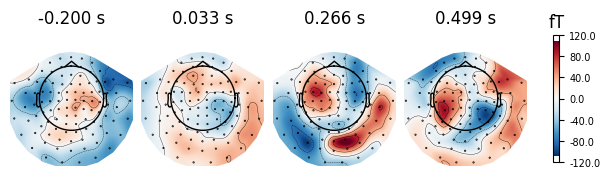

In [91]:
evokeds[2].plot_topomap();
evokeds[3].plot_topomap();
contrast = mne.combine_evoked(evokeds[2:], weights=[1, -1])
contrast.plot_topomap();

Exercises
--------------

1) How will you save evoked data to disk?


In [94]:
# your code here

2) Can you plot the topomap at 10 evenly spaced time instances?

HINT: Use np.linspace

In [96]:
# your code here



The [`Info`](https://martinos.org/mne/stable/generated/mne.Info.html) data structure
===========================================

The [`Info`](https://martinos.org/mne/stable/generated/mne.Info.html) data object is typically created
when data is imported into MNE-Python and contains details such as:

- date, subject information, and other recording details
- the sampling rate
- information about the data channels (name, type, position, etc.)
- digitized points
- sensor–head coordinate transformation matrices

and so forth. See the [`the API reference`](https://martinos.org/mne/stable/generated/mne.Info.html)
for a complete list of all data fields. Once created, this object is passed
around throughout the data analysis pipeline.



[`mne.Info`](https://martinos.org/mne/stable/generated/mne.Info.html) behaves as a nested Python dictionary:



In [14]:
import mne
import os.path as op

In [15]:
# Read the info object from an example recording
info = mne.io.read_info(
    op.join(mne.datasets.sample.data_path(), 'MEG', 'sample',
            'sample_audvis_raw.fif'), verbose=False)

In [16]:
print('Keys in info dictionary:\n', info.keys())

Keys in info dictionary:
 dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])


In [17]:
print(info['chs'][0])

{'scanno': 1, 'logno': 113, 'kind': 1 (FIFFV_MEG_CH), 'range': 0.00030517578125, 'cal': 3.1600000394149674e-09, 'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1), 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.0127    ,  0.0057    ,
       -0.99990302, -0.186801  , -0.98240298, -0.0033    , -0.98232698,
        0.18674099,  0.013541  ]), 'unit': 201 (FIFF_UNIT_T_M), 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'MEG 0113', 'coord_frame': 1 (FIFFV_COORD_DEVICE)}


In [18]:
print(info['sfreq'], 'Hz')

600.614990234375 Hz



Obtaining subsets of channels
-----------------------------

There are a number of convenience functions to obtain channel indices, given
an [`mne.Info`](https://martinos.org/mne/stable/generated/mne.Info.html#mne.Info) object.



Channel types
-------------

MNE supports different channel types:

- eeg : For EEG channels with data stored in Volts (V)
- meg (mag) : For MEG magnetometers channels stored in Tesla (T)
- meg (grad) : For MEG gradiometers channels stored in Tesla/Meter (T/m)
- ecg : For ECG channels stored in Volts (V)
- seeg : For Stereotactic EEG channels in Volts (V).
- ecog : For Electrocorticography (ECoG) channels in Volts (V).
- fnirs (HBO) : Functional near-infrared spectroscopy oxyhemoglobin data.
- fnirs (HBR) : Functional near-infrared spectroscopy deoxyhemoglobin data.
- emg : For EMG channels stored in Volts (V)
- bio : For biological channels (AU).
- stim : For the stimulus (a.k.a. trigger) channels (AU)
- resp : For the response-trigger channel (AU)
- chpi : For HPI coil channels (T).
- exci : Flux excitation channel used to be a stimulus channel.
- ias : For Internal Active Shielding data (maybe on Triux only).
- syst : System status channel information (on Triux systems only).

Obtaining information about channels
------------------------------------



Channel type of a specific channel

In [19]:
channel_type = mne.channel_type(info, 75)
print('Channel #75 is of type:', channel_type)

Channel #75 is of type: grad


In [21]:
meg_channels = mne.pick_types(info, meg=True)[:10]
channel_types = [mne.channel_type(info, ch) for ch in meg_channels]
print('First 10 MEG channels are of type:\n', channel_types)

First 10 MEG channels are of type:
 ['grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad']


Dropping channels from an info structure
----------------------------------------

It is possible to limit the info structure to only include a subset of
channels with the [`mne.pick_info`](https://martinos.org/mne/stable/generated/mne.pick_info.html#mne.pick_info) function:



In [23]:
# Only keep EEG channels
eeg_indices = mne.pick_types(info, meg=False, eeg=True)
reduced_info = mne.pick_info(info, eeg_indices)

print(reduced_info)

<Info | 19 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 59
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: []
 sfreq: 600.6 Hz
>
